# Predict a bank loan default

In [90]:
#importing relevant libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc('font' , size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import seaborn as sns
sns.set(style= 'white')
sns.set(style= 'whitegrid', color_codes=True)

In [50]:
#Importing our dataset from csv file
data=pd.read_csv( 'bank.csv')
data.head()

,loan_applicant_id,age,education,years_with_current_employer,years_at_current_address,household_income,debt_to_income_ratio,credit_card_debt,other_debt,y
0,191,44,university.degree,10,20,192,12.116645,14.377313,8.886645,1
1,34318,34,high.school,3,18,57,14.264229,5.137880,2.992730,0
2,14932,45,university.degree,14,24,212,7.285681,10.460306,4.985339,0
3,2776,33,illiterate,12,5,418,11.386272,3.040189,44.554429,1
4,11915,20,basic,4,19,122,28.418494,14.560450,20.110112,0


In [51]:
print(data.shape)

(41188, 10)


The dataset provides loan applicants’ information. It includes 41,188 records and 10 fields.

In [52]:
print(list(data.columns))

['loan_applicant_id', 'age', 'education', 'years_with_current_employer', 'years_at_current_address', 'household_income', 'debt_to_income_ratio', 'credit_card_debt', 'other_debt', 'y']


In [53]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   loan_applicant_id            41188 non-null  int64  
 1   age                          41188 non-null  int64  
 2   education                    41188 non-null  object 
 3   years_with_current_employer  41188 non-null  int64  
 4   years_at_current_address     41188 non-null  int64  
 5   household_income             41188 non-null  int64  
 6   debt_to_income_ratio         41188 non-null  float64
 7   credit_card_debt             41188 non-null  float64
 8   other_debt                   41188 non-null  float64
 9   y                            41188 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 3.1+ MB


Input variables
1.	loan_applicant_id (numeric)
2.	age (numeric)
3.	education : level of education (categorical)
4.	years_with_current_employer (numeric)
5.	years_at_current_address (numeric)
6.	household_income: in thousands of USD (numeric)
7.	debt_to_income_ratio: in percent (numeric)
8.	credit_card_debt: in thousands of USD (numeric)
9.	other_debt: in thousands of USD (numeric)

Predict variable (desired target):
y — has the loan applicant defaulted on his loan? (binary: “1”, means “Yes”, “0” means “No”)


In [54]:
dp = data['education'].unique()
print(dp)

['university.degree' 'high.school' 'illiterate' 'basic'
 'professional.course']


In [55]:
from wordcloud import WordCloud
from matplotlib import colors 

color_list=  ['DarkBlue','Teal','LightBlue','MediumAquamarine','Plum','OrangeRed','DarkRed','Pink','LightGoldenrodYellow']

colormap = colors.ListedColormap(color_list)

plt.rcParams['figure.figsize'] = (15,15)

wordcloud =  WordCloud(background_color= 'white',
                       width = 1200,height = 800 ,
                       max_words = 120,colormap = colormap ).generate(" ".join(dp))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

OSError: cannot open resource

In [56]:
#Let us check if there are any missing values in the data.
data.isnull().sum()

loan_applicant_id              0
age                            0
education                      0
years_with_current_employer    0
years_at_current_address       0
household_income               0
debt_to_income_ratio           0
credit_card_debt               0
other_debt                     0
y                              0
dtype: int64

No missing values!!!!

# Data exploration

In [57]:
# standard statistics
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
loan_applicant_id,41188.0,20594.500000,11890.095780,1.000000,10297.750000,20594.500000,30891.250000,41188.000000
age,41188.0,38.007842,10.623627,20.000000,29.000000,38.000000,47.000000,56.000000
years_with_current_employer,41188.0,13.549869,8.145105,0.000000,6.000000,14.000000,21.000000,29.000000
years_at_current_address,41188.0,15.385331,9.184471,0.000000,7.000000,15.000000,23.000000,31.000000
household_income,41188.0,139.707366,81.688037,14.000000,74.000000,134.000000,196.000000,446.000000
debt_to_income_ratio,41188.0,16.224054,9.191426,0.400386,8.452497,16.105334,23.730786,41.293984
credit_card_debt,41188.0,9.577260,12.408628,0.005668,1.853292,5.311447,12.636789,149.015859
other_debt,41188.0,13.758168,14.596510,0.021759,3.783906,9.153871,18.906855,159.198221
y,41188.0,0.112654,0.316173,0.000000,0.000000,0.000000,0.000000,1.000000


In [58]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

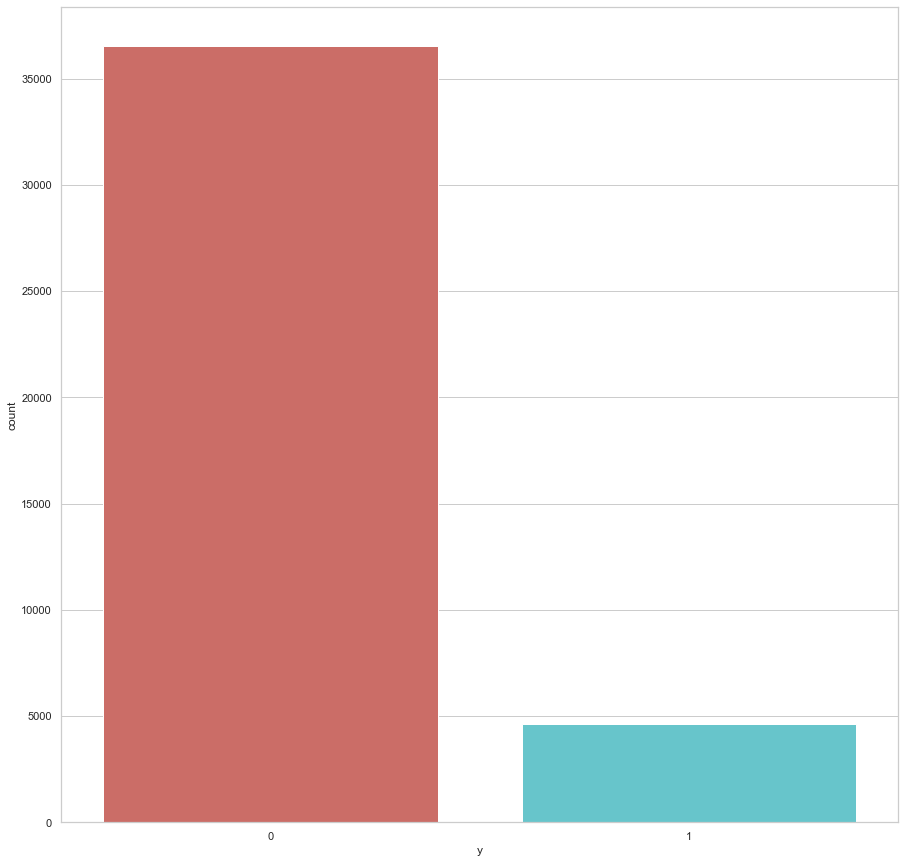

In [59]:
sns.countplot(x='y', data=data, palette='hls')
plt.show()

In [60]:
count_no_default = len(data[data['y']==0])
count_default = len(data[data['y']==1])
pct_of_no_default = count_no_default/(count_no_default+count_default)
print("\033[1m percentage of no default is", pct_of_no_default*100)
pct_of_default = count_default/(count_no_default+count_default)
print("\033[1m percentage of default", pct_of_default*100)

 percentage of no default is 88.73458288821988
 percentage of default 11.265417111780131


In [61]:
data.groupby('y').mean()

,loan_applicant_id,age,years_with_current_employer,years_at_current_address,household_income,debt_to_income_ratio,credit_card_debt,other_debt
y,,,,,,,,
0,22914.5,37.975676,13.447521,15.497729,128.300646,15.514879,7.810996,12.127154
1,2320.5,38.261207,14.356034,14.500000,229.554957,21.810028,23.489629,26.605214


* The average age of loan applicants who defaulted on their loans is higher than that of the loan applicants who didn’t.
* Surprisingly, years_with_current_employer (years with current employer) are higher for the loan applicants who defaulted on their loans.
* Understandably, years_at_current_address (years at current address) are lower the loan applicants who defaulted on their loans. The lower the years at current address, the higher the chance to default on a loan.
* Surprisingly, household_income (household income) is higher for the loan applicants who defaulted on their loans.
* Understandably, debt_to_income_ratio (debt to income ratio) is higher for the loan applicants who defaulted on their loans.
* Understandably, credit_card_debt (credit card debt) is higher for the loan applicants who defaulted on their loans.
* Naturaly , other_debt (other debt) is higher for the loan applicants who defaulted on their loans.

We can calculate categorical mean for our categorical variable “education” to get a more detailed sense of our data.

In [62]:
data.groupby('education').mean()

,loan_applicant_id,age,years_with_current_employer,years_at_current_address,household_income,debt_to_income_ratio,credit_card_debt,other_debt,y
education,,,,,,,,,
basic,20715.466902,37.926138,13.452422,15.372353,139.645291,16.259856,9.623007,13.578631,0.112558
high.school,20496.678068,38.027093,13.585877,15.314944,139.625598,16.192938,9.512649,13.766241,0.112296
illiterate,20381.154156,38.010513,13.483130,15.424694,139.980562,16.270517,9.645607,13.962909,0.116137
professional.course,20543.622328,38.135690,13.641278,15.310860,138.129981,16.138116,9.343046,13.543704,0.109208
university.degree,20828.736579,37.941197,13.585645,15.501012,141.127128,16.258214,9.758195,13.936749,0.113082


# Data Visualization

C:\Users\YASSI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


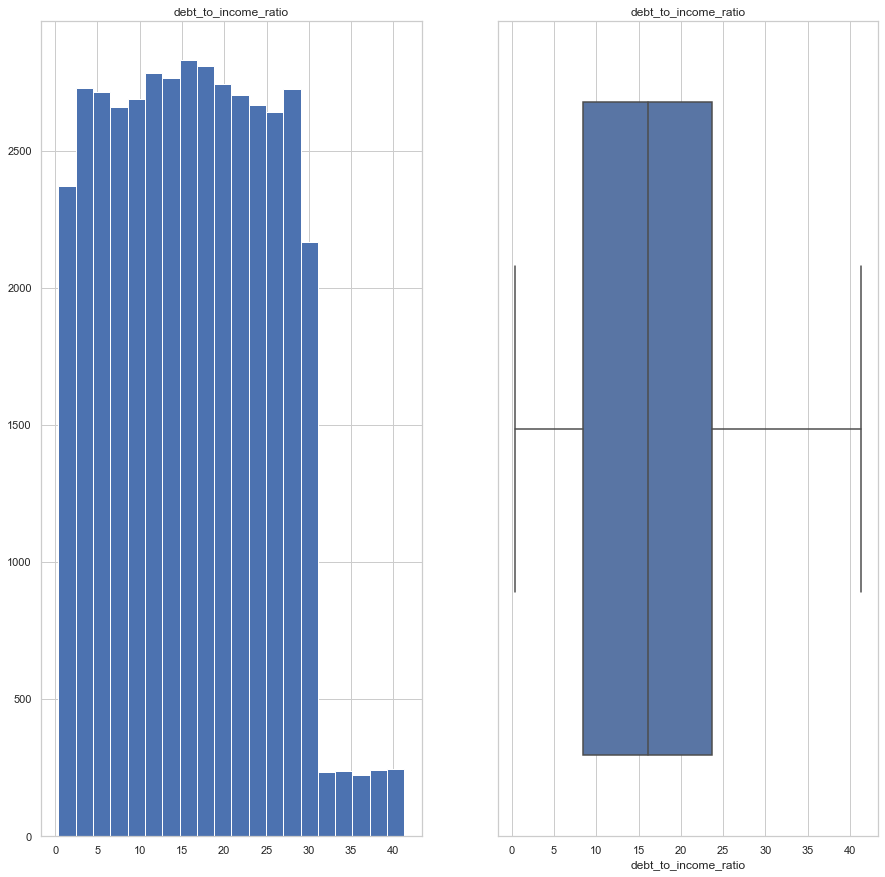

C:\Users\YASSI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


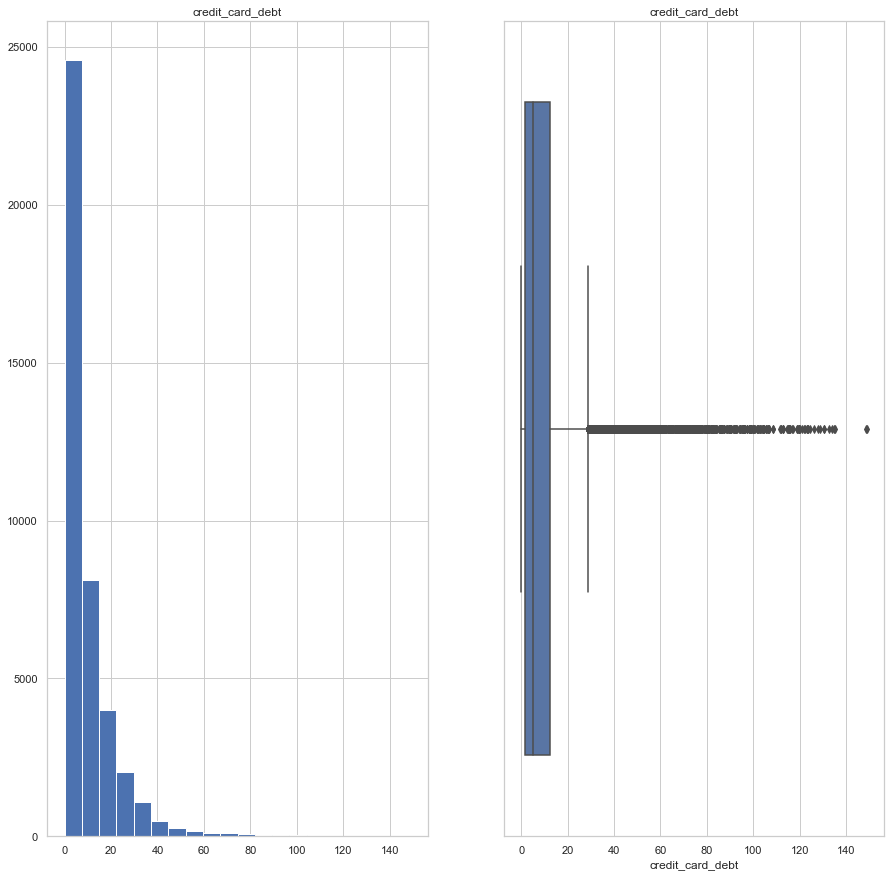

C:\Users\YASSI\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


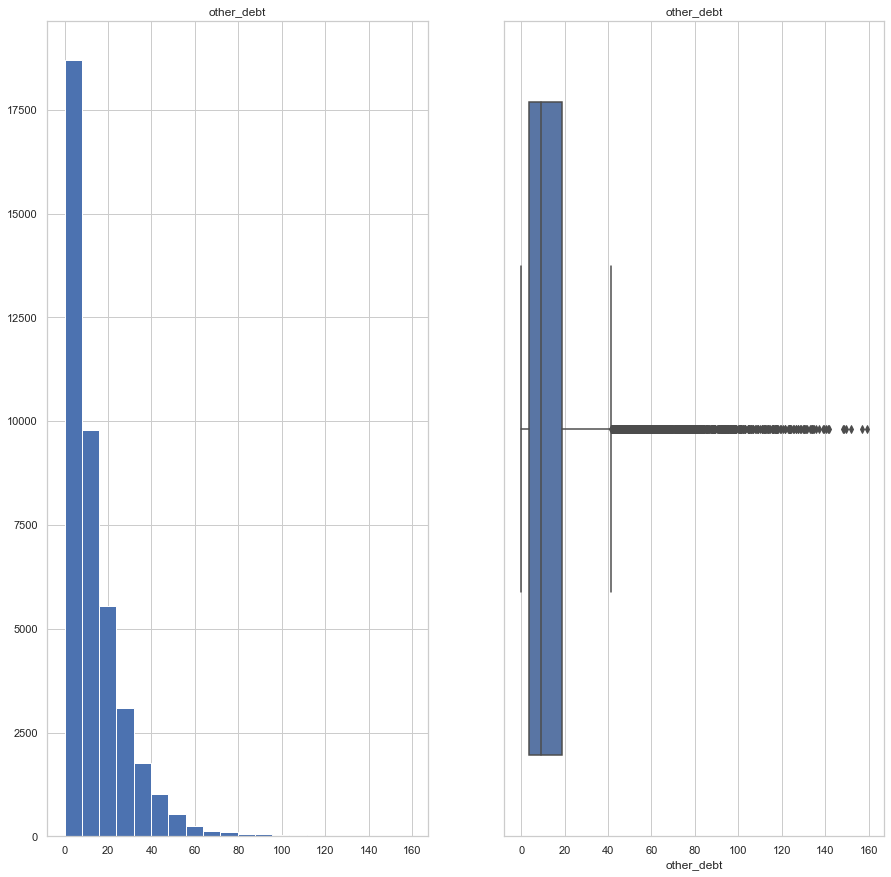

In [63]:
# Data Visualization
for col in data.columns:
    if data[col].dtypes=="float64":
        plt.subplot(1,2,1)
        plt.hist(data[col], bins=20)
        plt.title(col)
        plt.subplot(1,2,2)
        sns.boxplot(data[col], orient="h")
        plt.title(col)
        plt.show()

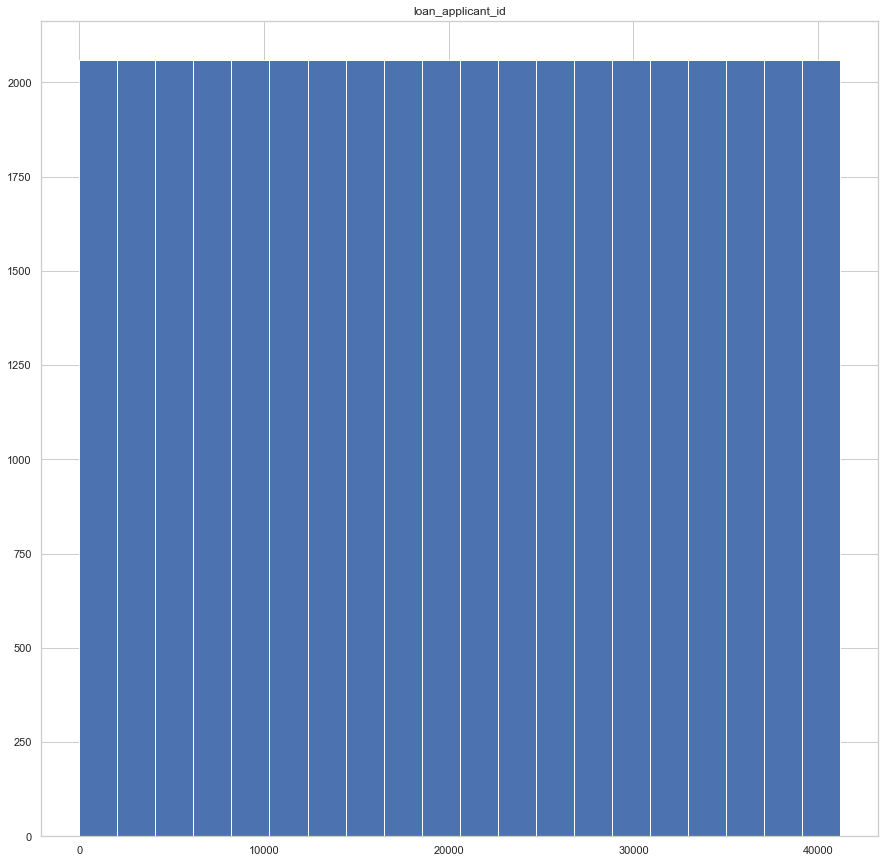

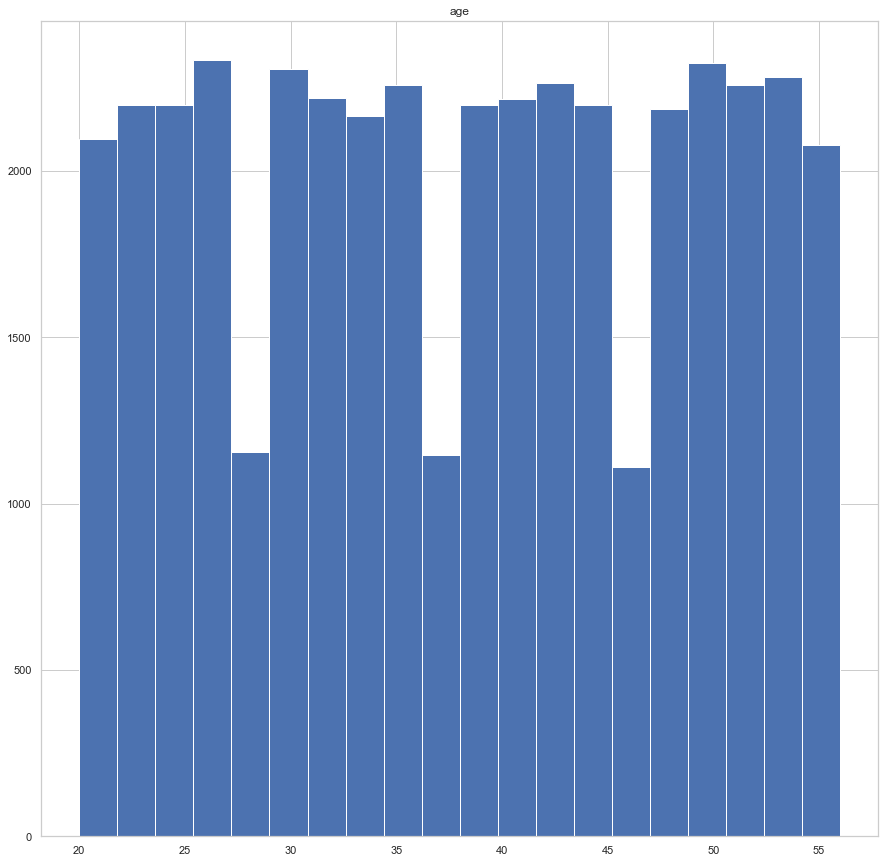

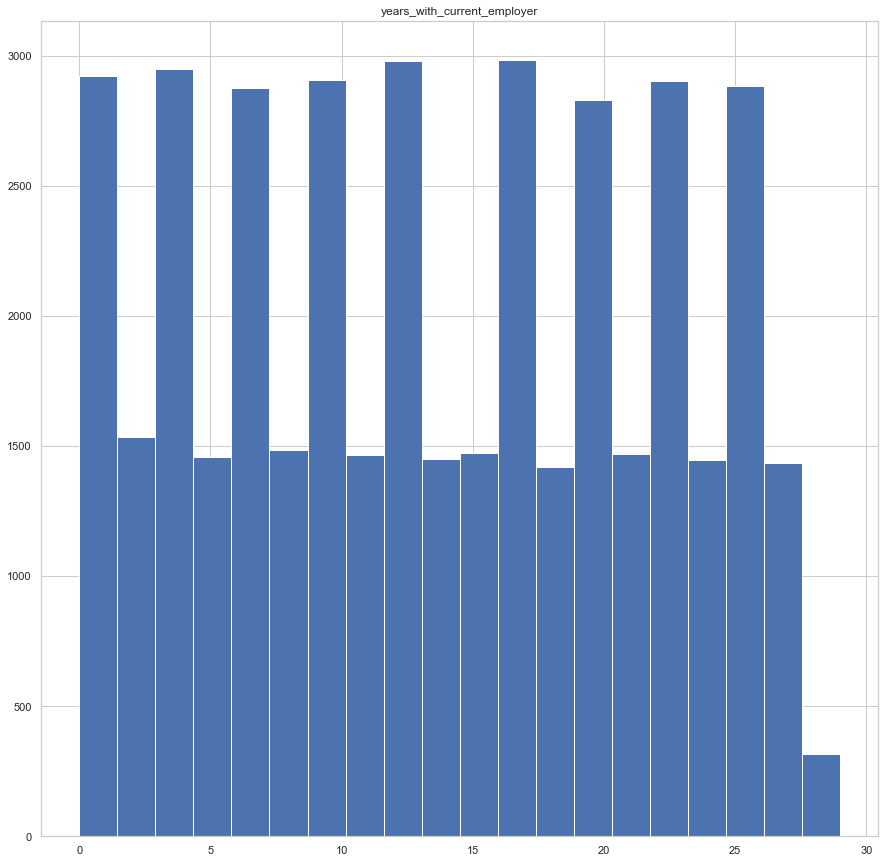

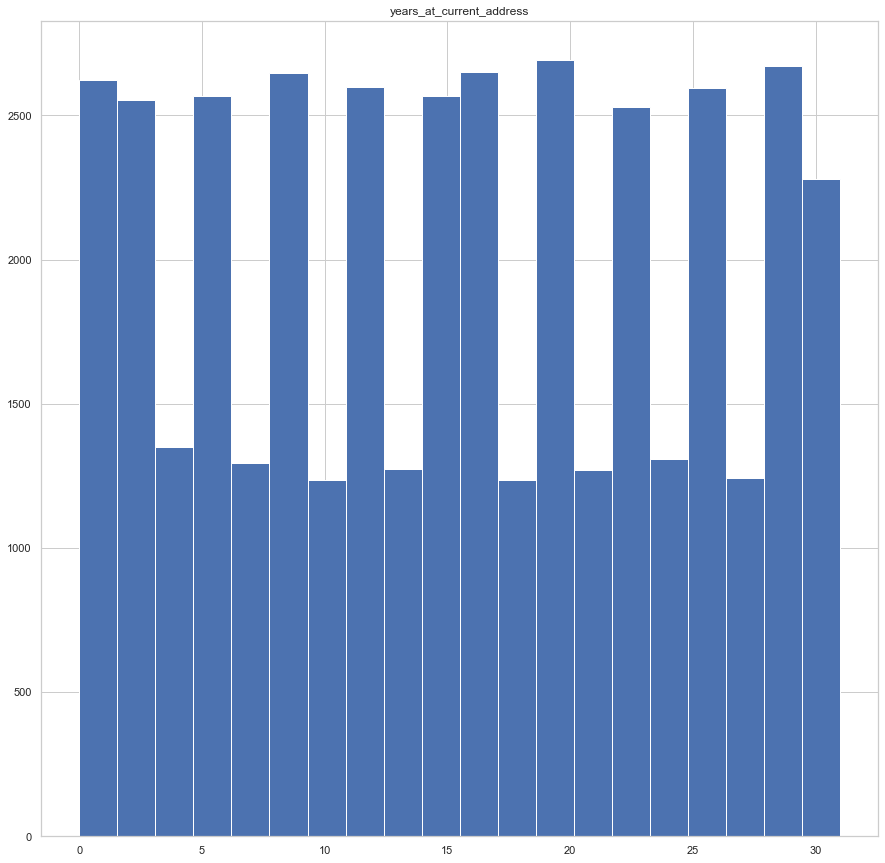

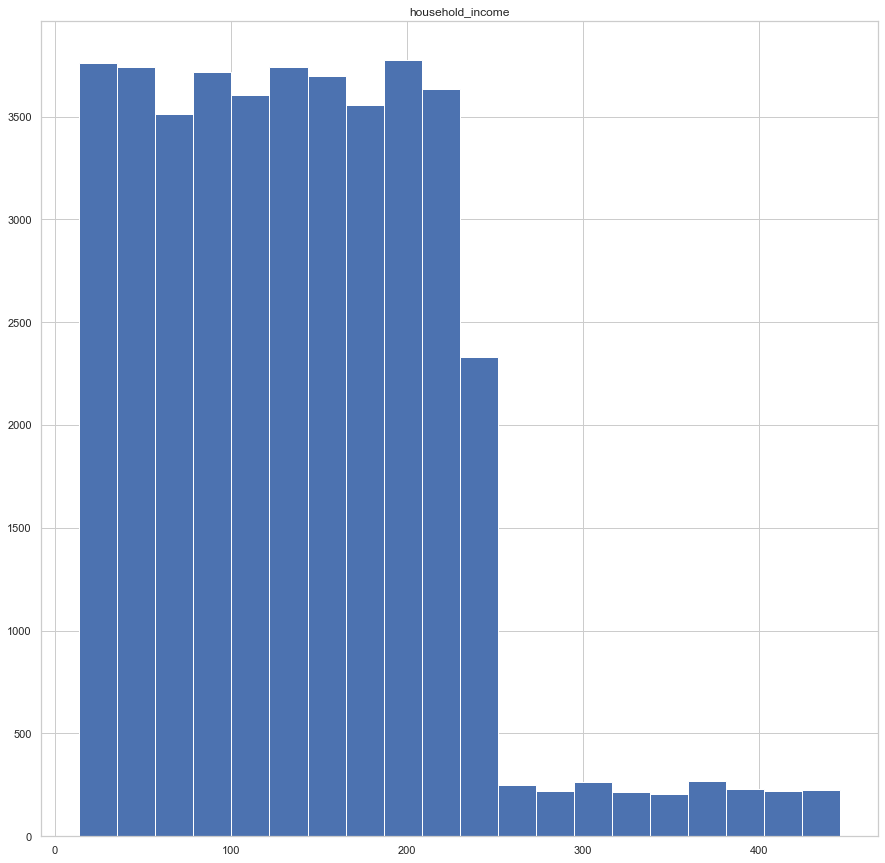

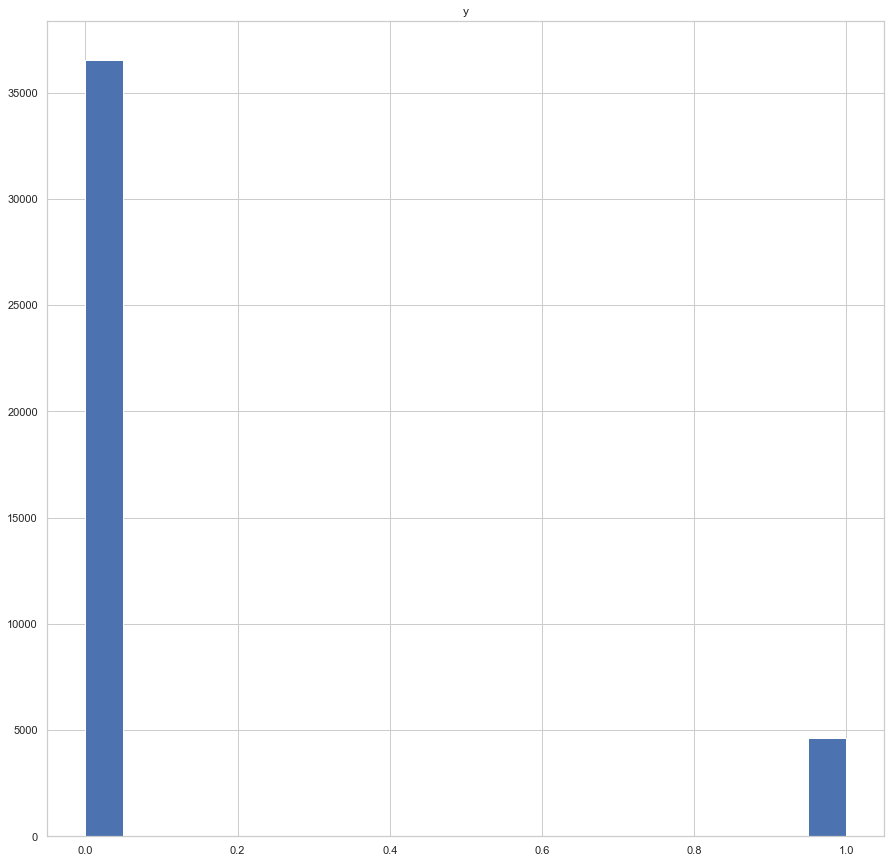

In [64]:
for col in data.columns:
    if data[col].dtypes=="int64":
        plt.hist(data[col], bins=20)
        plt.title(col)
        plt.show()

C:\Users\YASSI\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\YASSI\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

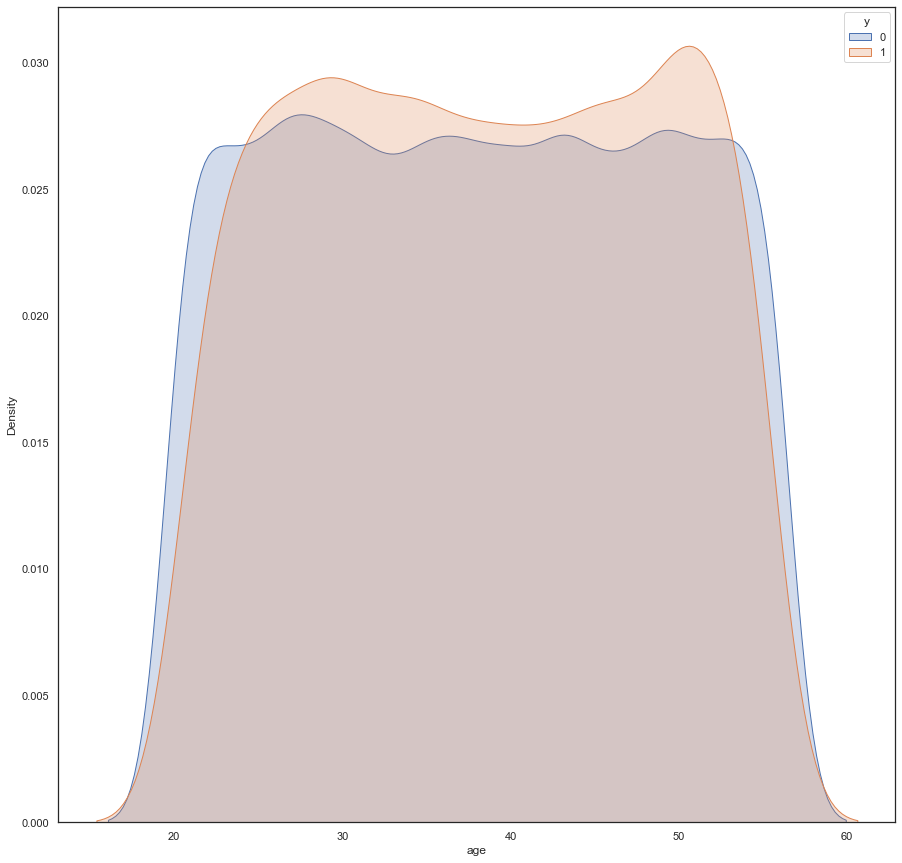

In [65]:
import seaborn as sns
sns.set(style="white")
sns.kdeplot( data['age'].loc[data['y'] == 0], hue=data['y'], shade=True)
sns.kdeplot( data['age'].loc[data['y'] == 1], hue=data['y'], shade=True)

In [66]:
data['age'].loc[data['y'] == 0].describe()

count    36548.000000
mean        37.975676
std         10.686491
min         20.000000
25%         29.000000
50%         38.000000
75%         47.000000
max         56.000000
Name: age, dtype: float64

In [67]:
data['age'].loc[data['y'] == 1].describe()

count    4640.000000
mean       38.261207
std        10.112340
min        21.000000
25%        29.000000
50%        38.000000
75%        47.000000
max        55.000000
Name: age, dtype: float64

The age does not seem a strong predictor for the target variable.

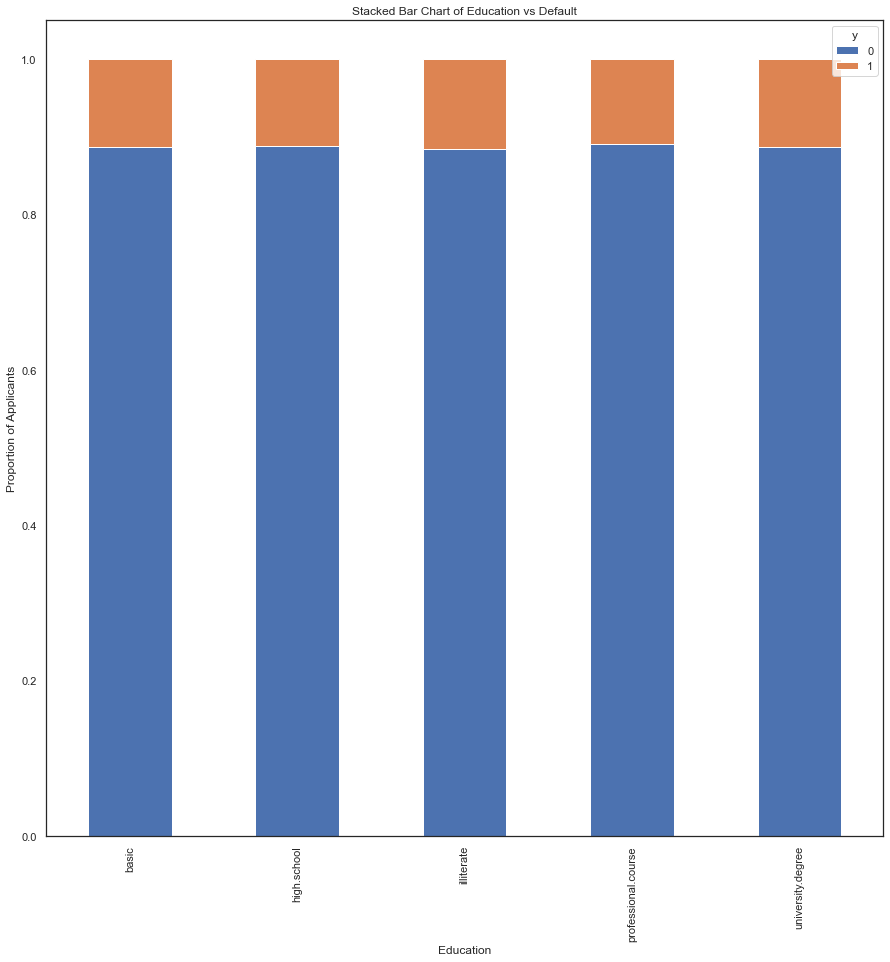

In [68]:
table=pd.crosstab(data.education,data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title("Stacked Bar Chart of Education vs Default")
plt.xlabel("Education")
plt.ylabel("Proportion of Applicants")
plt.savefig("education_vs_def_stack")

The education does not seem a strong predictor for the target variable.

C:\Users\YASSI\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\YASSI\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='years_with_current_employer', ylabel='Density'>

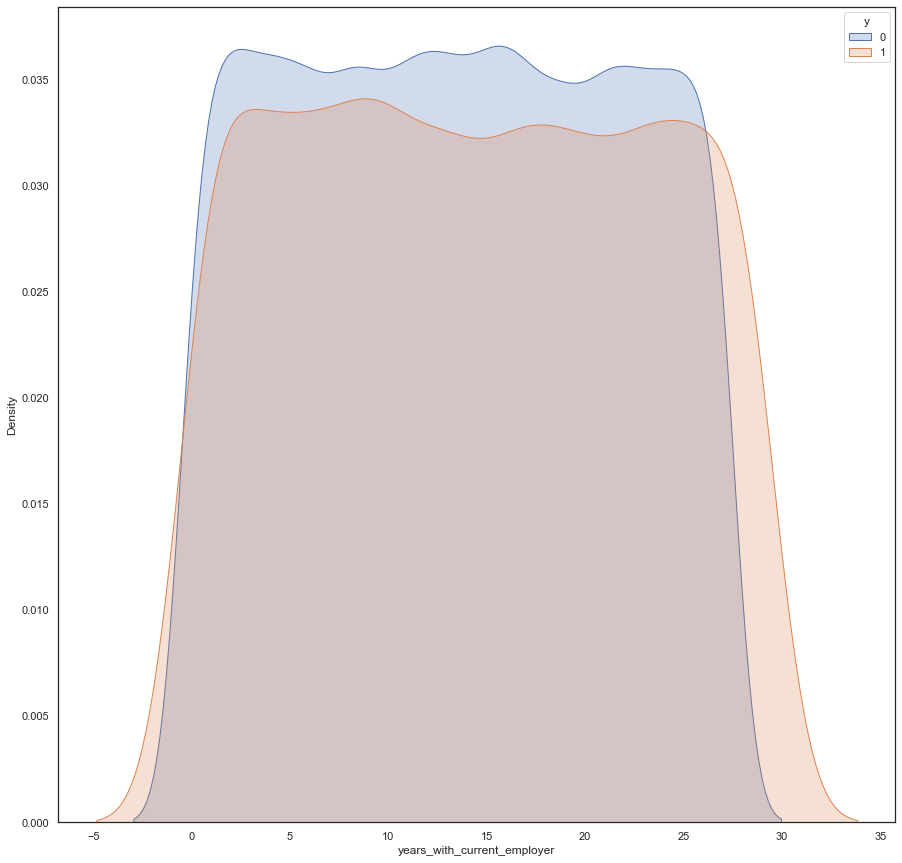

In [69]:
sns.kdeplot( data['years_with_current_employer'].loc[data['y'] == 0], hue=data['y'], shade=True)
sns.kdeplot( data['years_with_current_employer'].loc[data['y'] == 1], hue=data['y'], shade=True)

C:\Users\YASSI\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\YASSI\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='years_at_current_address', ylabel='Density'>

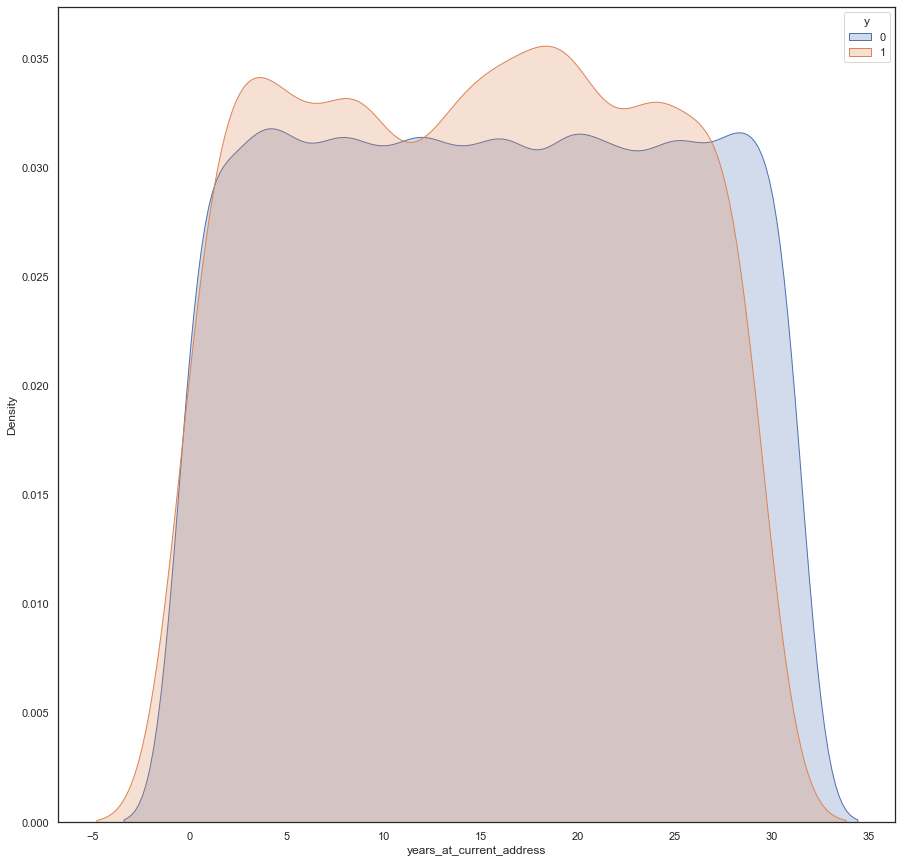

In [71]:
sns.kdeplot( data['years_at_current_address'].loc[data['y'] == 0], hue=data['y'], shade=True)
sns.kdeplot( data['years_at_current_address'].loc[data['y'] == 1], hue=data['y'], shade=True)

C:\Users\YASSI\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\YASSI\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='household_income', ylabel='Density'>

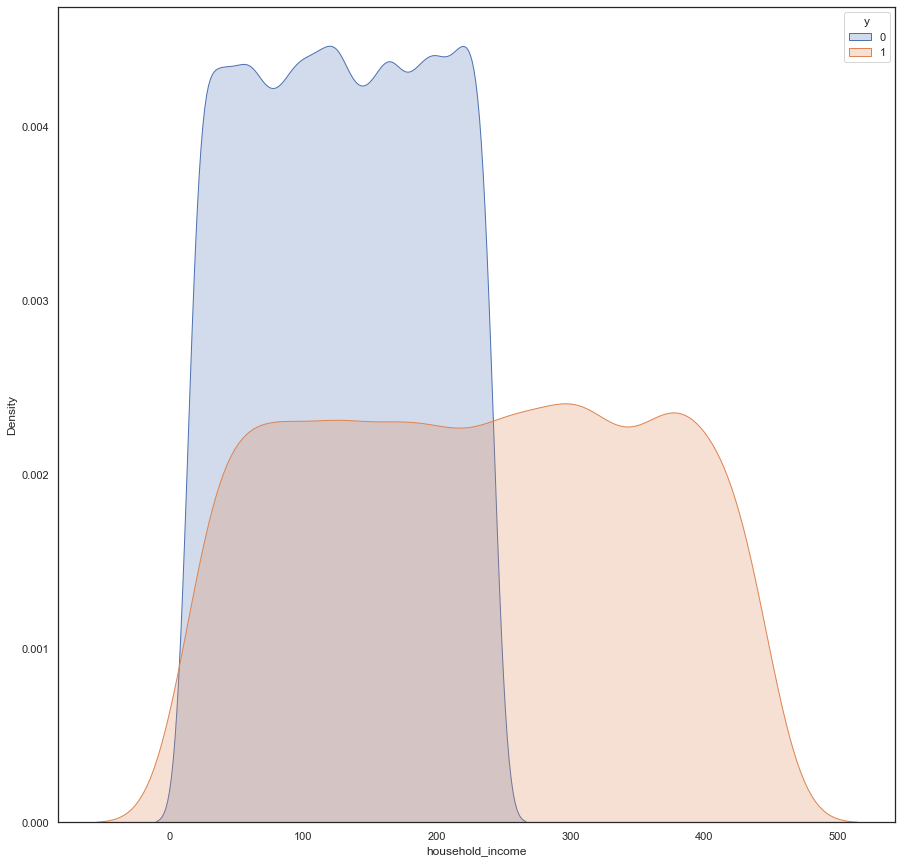

In [72]:
sns.kdeplot( data['household_income'].loc[data['y'] == 0], hue=data['y'], shade=True)
sns.kdeplot( data['household_income'].loc[data['y'] == 1], hue=data['y'], shade=True)

C:\Users\YASSI\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\YASSI\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='debt_to_income_ratio', ylabel='Density'>

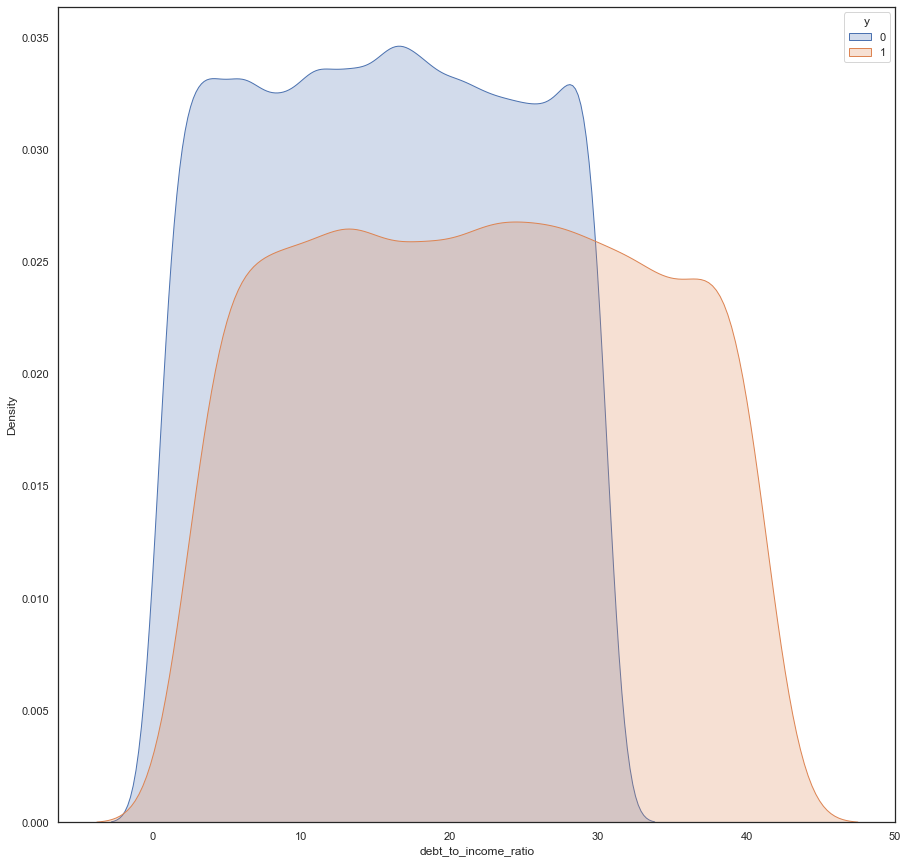

In [73]:
sns.kdeplot( data['debt_to_income_ratio'].loc[data['y'] == 0], hue=data['y'], shade=True)
sns.kdeplot( data['debt_to_income_ratio'].loc[data['y'] == 1], hue=data['y'], shade=True)

C:\Users\YASSI\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\YASSI\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='credit_card_debt', ylabel='Density'>

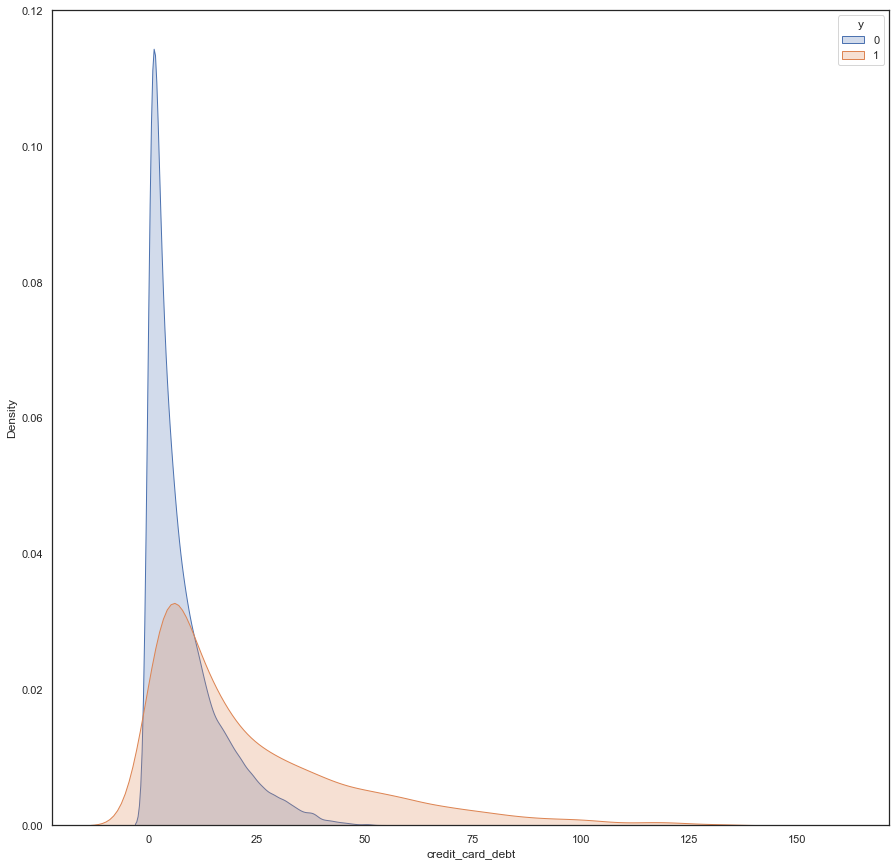

In [74]:
sns.kdeplot( data['credit_card_debt'].loc[data['y'] == 0], hue=data['y'], shade=True)
sns.kdeplot( data['credit_card_debt'].loc[data['y'] == 1], hue=data['y'], shade=True)

C:\Users\YASSI\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\YASSI\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='other_debt', ylabel='Density'>

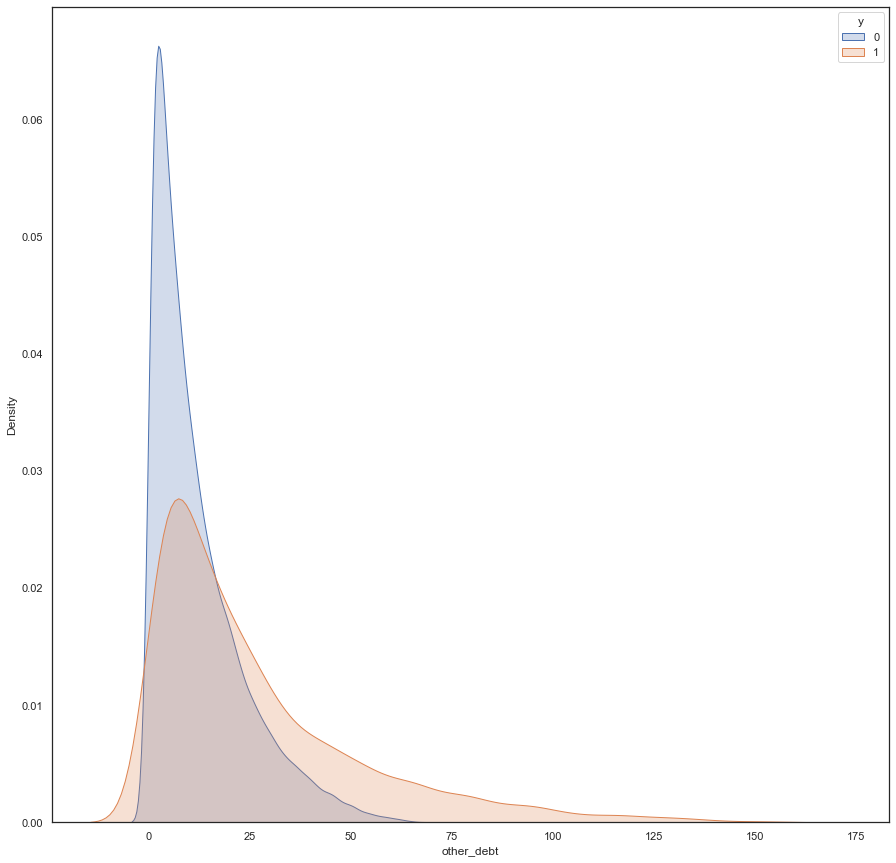

In [75]:
sns.kdeplot( data['other_debt'].loc[data['y'] == 0], hue=data['y'], shade=True)
sns.kdeplot( data['other_debt'].loc[data['y'] == 1], hue=data['y'], shade=True)

Create dummy variables: education variable is categorical so i use dummy function to convert education into many columns for each level. 

In [77]:

cat_vars=['education']
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1
cat_vars=['education']
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]

In [79]:
data_final=data[to_keep]

#drop loan applicant id column because it is unnecesary
data_final.drop(['loan_applicant_id'], axis=1, inplace=True)
data_final.columns.values

C:\Users\YASSI\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


array(['age', 'years_with_current_employer', 'years_at_current_address',
       'household_income', 'debt_to_income_ratio', 'credit_card_debt',
       'other_debt', 'y', 'education_basic', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree'], dtype=object)

In [81]:
data_final.head()

,age,years_with_current_employer,years_at_current_address,household_income,debt_to_income_ratio,credit_card_debt,other_debt,y,education_basic,education_high.school,education_illiterate,education_professional.course,education_university.degree
0,44,10,20,192,12.116645,14.377313,8.886645,1,0,0,0,0,1
1,34,3,18,57,14.264229,5.137880,2.992730,0,0,1,0,0,0
2,45,14,24,212,7.285681,10.460306,4.985339,0,0,0,0,0,1
3,33,12,5,418,11.386272,3.040189,44.554429,1,0,0,1,0,0
4,20,4,19,122,28.418494,14.560450,20.110112,0,1,0,0,0,0


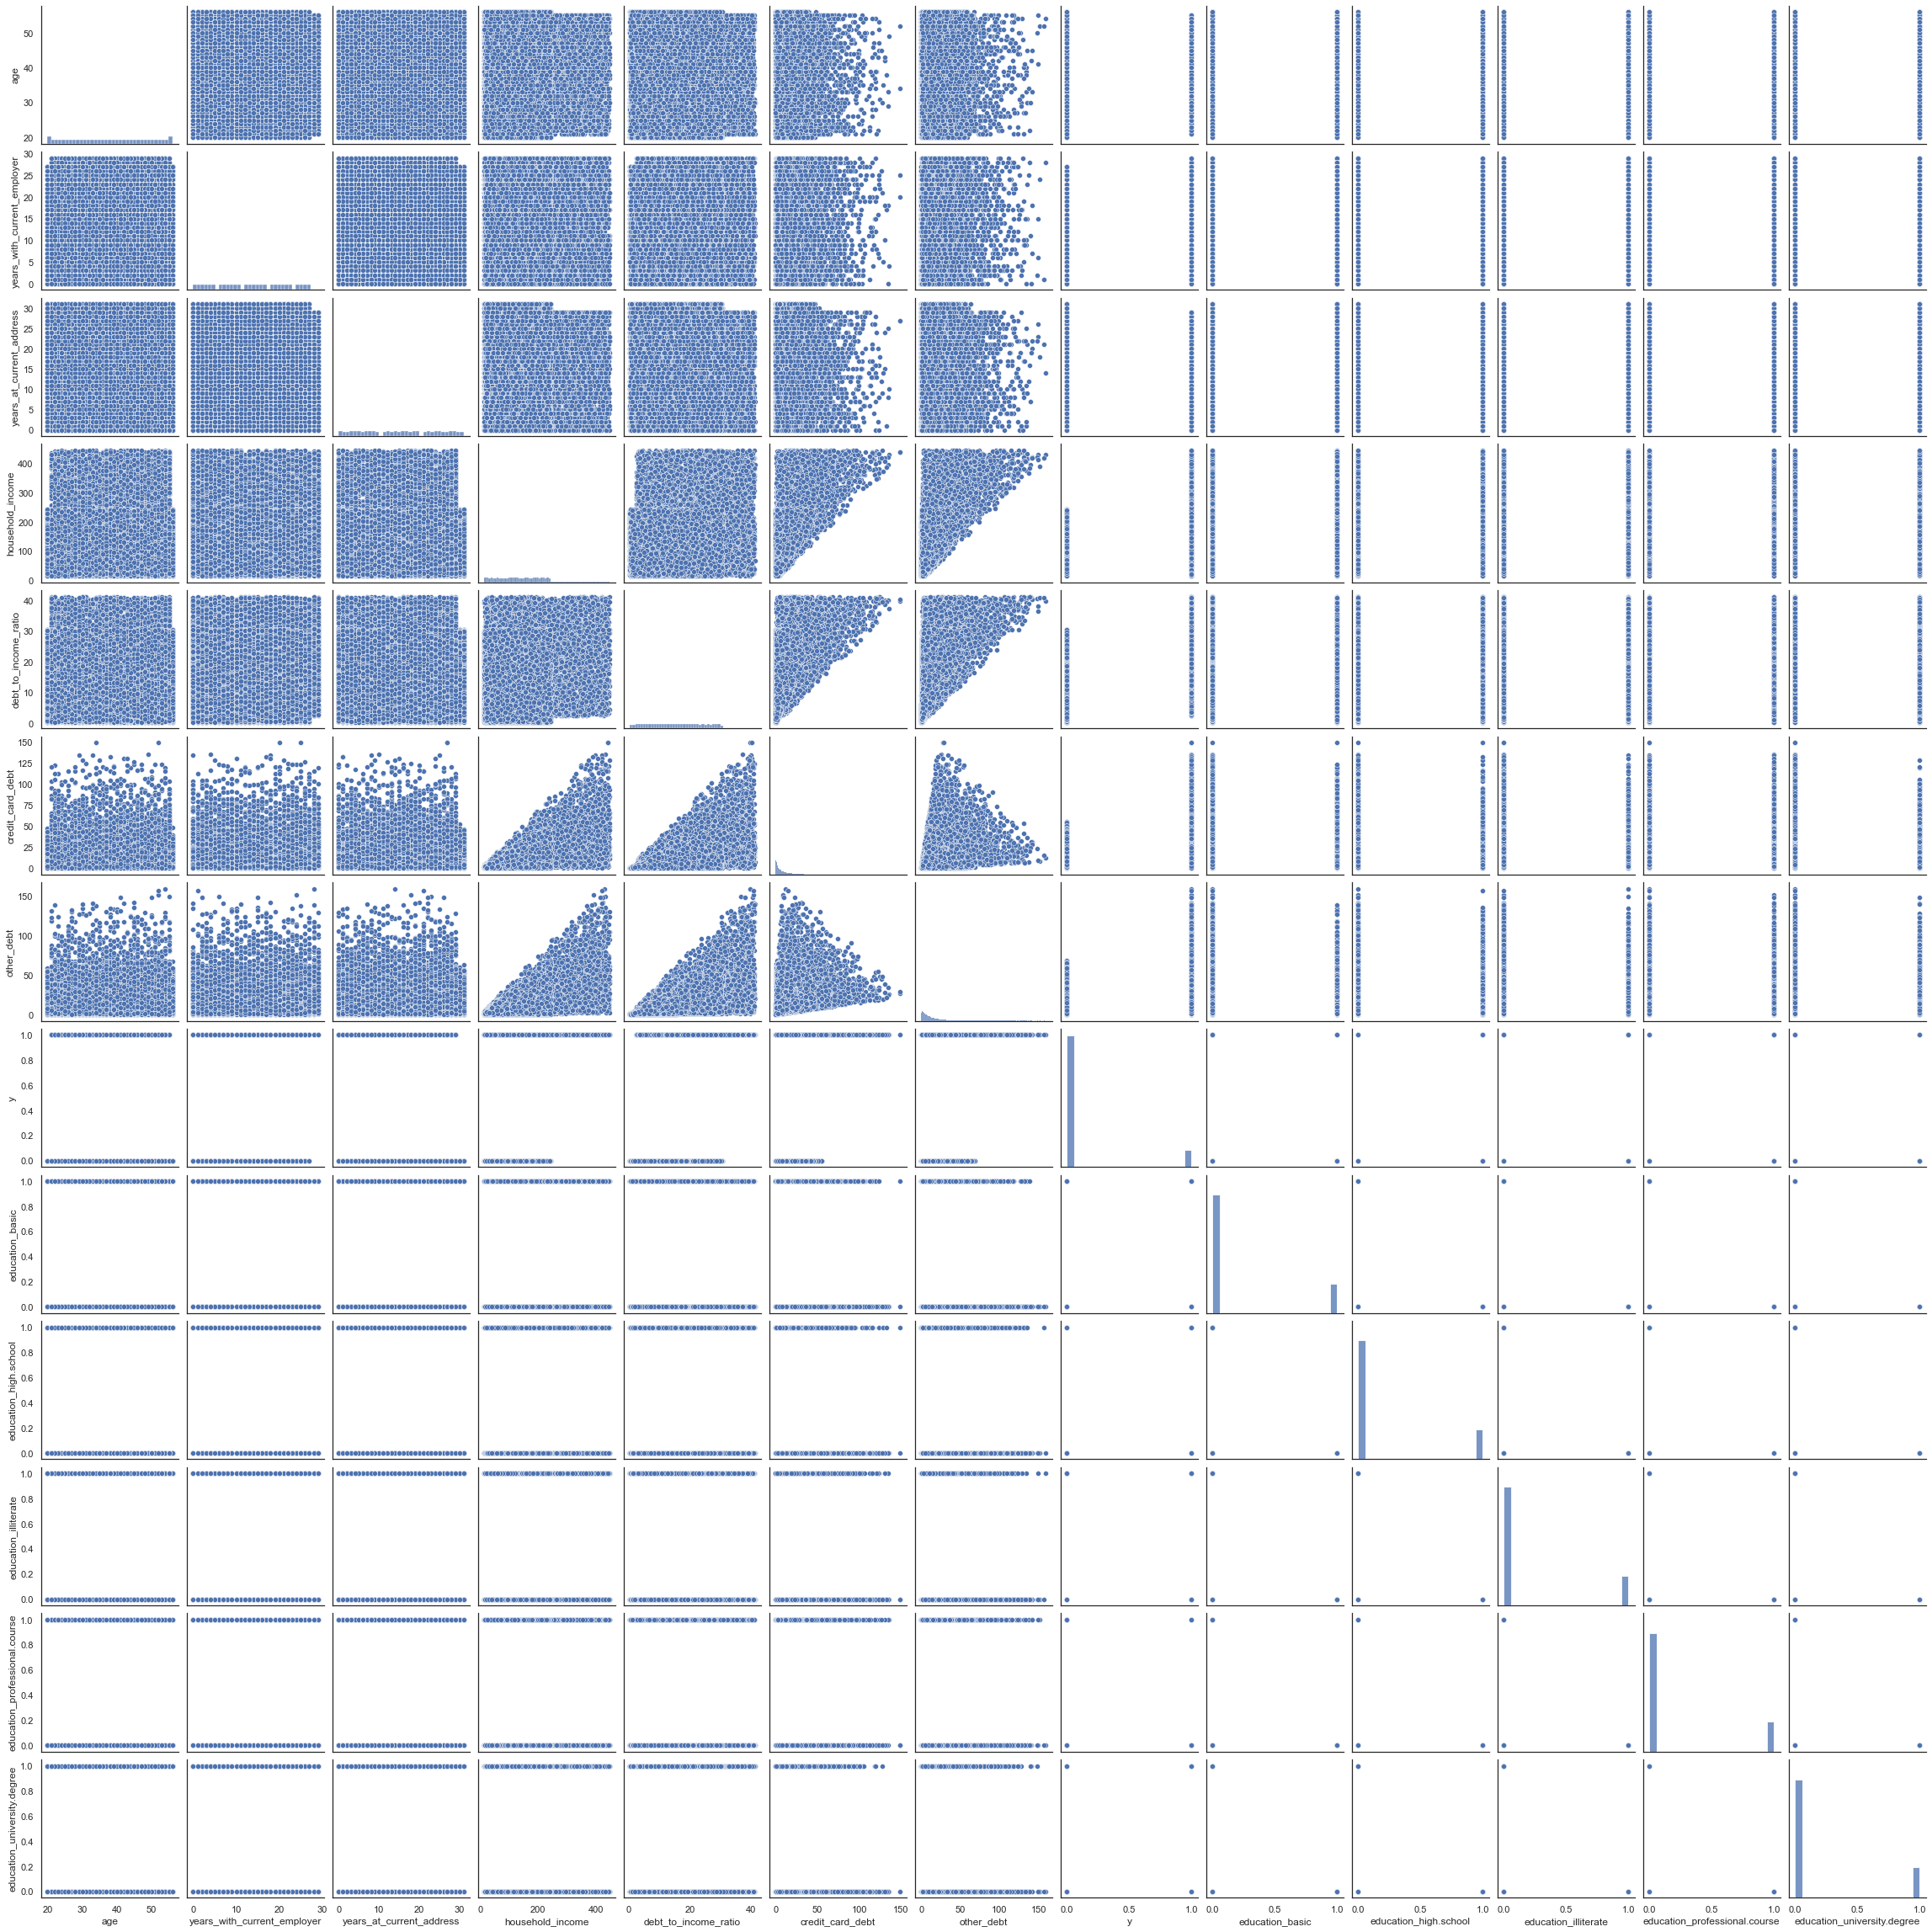

In [83]:
sns.pairplot(data_final)

In [88]:
corrMatrix = data_final.corr()

In [89]:
corrMatrix

,age,years_with_current_employer,years_at_current_address,household_income,debt_to_income_ratio,credit_card_debt,other_debt,y,education_basic,education_high.school,education_illiterate,education_professional.course,education_university.degree
age,1.000000,0.003541,-0.000792,0.012941,0.002368,0.006742,0.008382,0.008498,-0.003840,0.000901,0.000125,0.006015,-0.003176
years_with_current_employer,0.003541,1.000000,0.003735,0.017895,0.015861,0.021350,0.019016,0.035266,-0.005973,0.002197,-0.004079,0.005609,0.002223
years_at_current_address,-0.000792,0.003735,1.000000,-0.015017,-0.016278,-0.016825,-0.015577,-0.034347,-0.000705,-0.003808,0.002134,-0.004052,0.006376
household_income,0.012941,0.017895,-0.015017,1.000000,0.089134,0.570904,0.602902,0.391905,-0.000379,-0.000497,0.001665,-0.009651,0.008798
debt_to_income_ratio,0.002368,0.015861,-0.016278,0.089134,1.000000,0.512834,0.587590,0.216545,0.001945,-0.001682,0.002517,-0.004673,0.001881
credit_card_debt,0.006742,0.021350,-0.016825,0.570904,0.512834,1.000000,0.381699,0.399494,0.001841,-0.002588,0.002742,-0.009434,0.007381
other_debt,0.008382,0.019016,-0.015577,0.602902,0.587590,0.381699,1.000000,0.313608,-0.006141,0.000275,0.006983,-0.007343,0.006193
y,0.008498,0.035266,-0.034347,0.391905,0.216545,0.399494,0.313608,1.000000,-0.000152,-0.000563,0.005484,-0.005448,0.000685
education_basic,-0.003840,-0.005973,-0.000705,-0.000379,0.001945,0.001841,-0.006141,-0.000152,1.000000,-0.248101,-0.248537,-0.249522,-0.252719
education_high.school,0.000901,0.002197,-0.003808,-0.000497,-0.001682,-0.002588,0.000275,-0.000563,-0.248101,1.000000,-0.247384,-0.248365,-0.251547


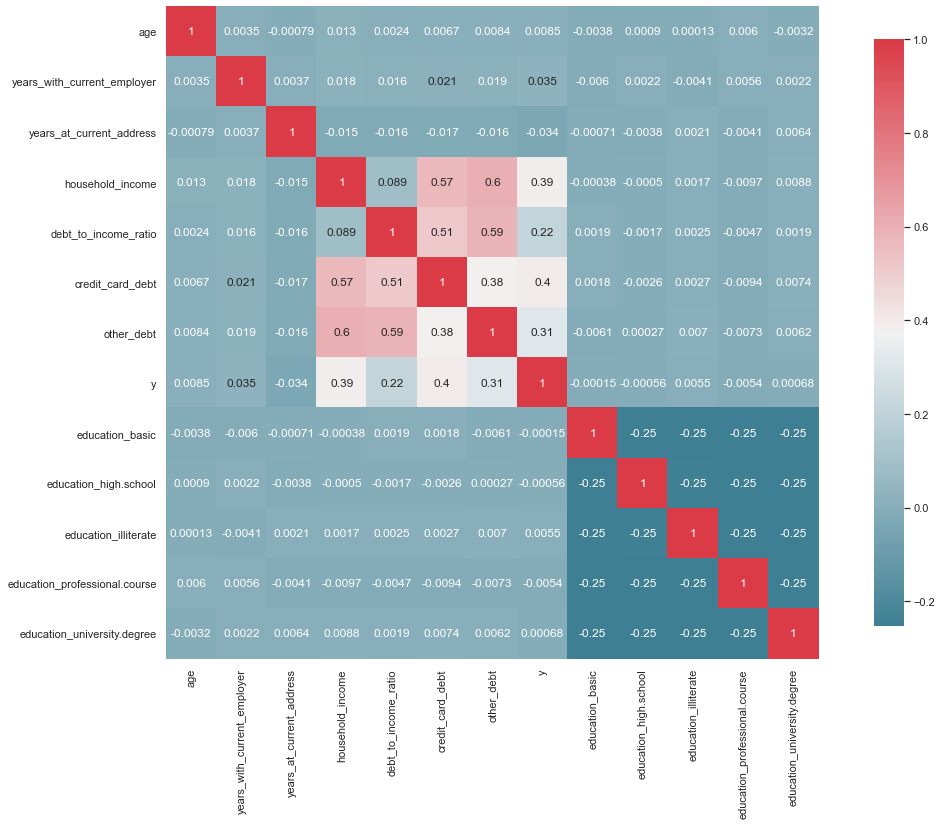

In [87]:
def plot_correlation_map( data_final ):

    corr = data_final.corr()

    s , ax = plt.subplots( figsize =( 20 , 12 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )
plot_correlation_map(data_final)

In [ ]:
y/credit_card_debt/household_income are correlated (important features).

<AxesSubplot:>

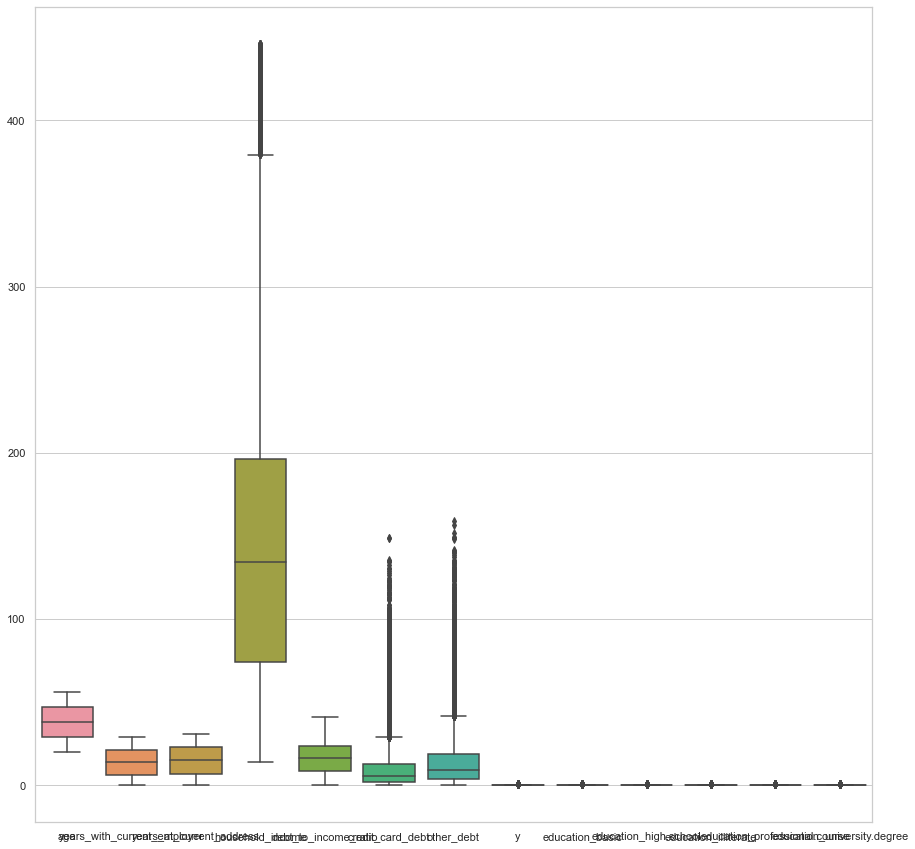

In [97]:
sns.boxplot(data= data_final)

A common (mistaken) conclusion from this graph is that Education is a less important feature than debt_to_income_ratio. However, the truth is that: it’s a simple scaling problem.

In fact, the BALANCE ranges from 0 to 19043.138560 and the CREDIT_LIMIT ranges from 50 to 30000.

the PAYMENTS ranges from 0 to 50721.483360 and the salary ranges from 0 to 3000.

the MINIMUM_PAYMENTS ranges from 0.019163 to 76406.207520

Or the education_basic ,education_high.school , education_illiterate, education_professional.course and education_university.degree ranges from 0 to 1 .

One way of fixing this visual issue is standardization.

In [99]:
from sklearn.preprocessing import StandardScaler, normalize

# Scaling the data so that all the features become comparable
scaler = StandardScaler()
X_scaled = scaler.fit_transform(data_final)

# Normalizing the data so that the data approximately
# follows a Gaussian distribution
X_normalized = normalize(X_scaled)

# Converting the numpy array into a pandas DataFrame
X_normalized = pd.DataFrame(X_normalized)

<AxesSubplot:>

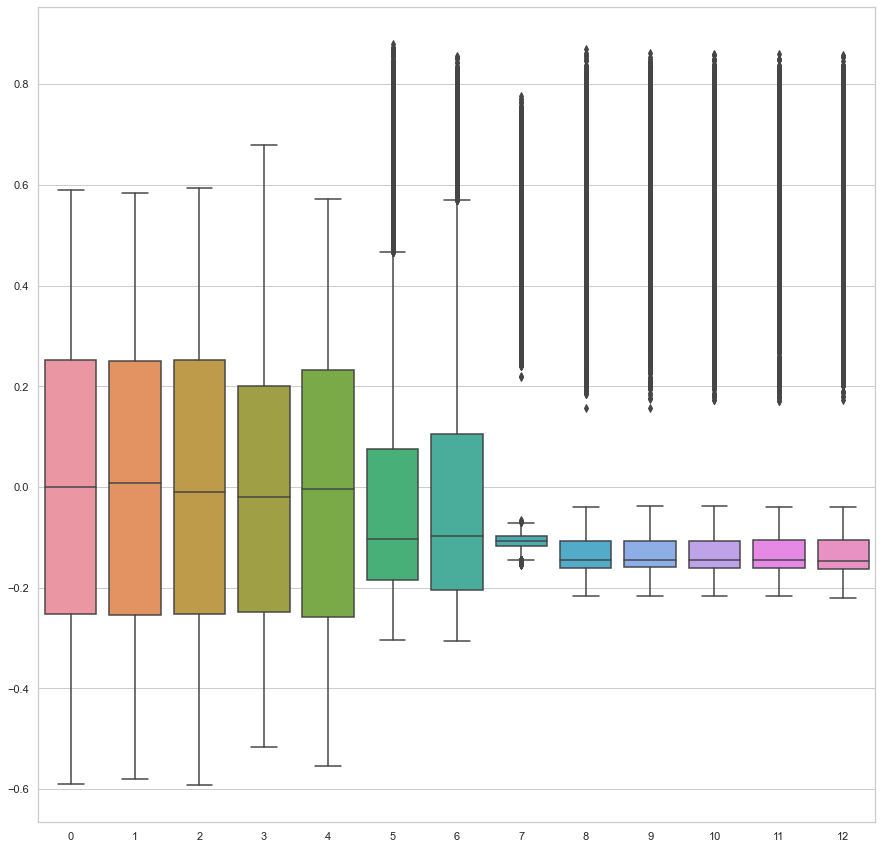

In [100]:
sns.boxplot(data= X_normalized)

In [101]:
X_normalized

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.148617,-0.114835,0.132387,0.168671,-0.117745,0.101925,-0.087937,0.739479,-0.131546,-0.130935,-0.131166,-0.131686,0.520521
1,-0.127008,-0.436059,0.095842,-0.340864,-0.071784,-0.120446,-0.248301,-0.119955,-0.168079,0.677463,-0.167593,-0.168258,-0.170414
2,0.226624,0.019029,0.322963,0.304722,-0.334845,0.024503,-0.206947,-0.122685,-0.171904,-0.171107,-0.171407,-0.172087,0.680218
3,-0.084578,-0.034141,-0.202883,0.611254,-0.094437,-0.094523,0.378554,0.503554,-0.089577,-0.089162,0.360418,-0.089672,-0.090821
4,-0.495555,-0.342771,0.115058,-0.063372,0.387866,0.117405,0.127222,-0.104166,0.585564,-0.145279,-0.145534,-0.146111,-0.147983
...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,0.332448,-0.376716,-0.398295,-0.101114,-0.137307,-0.121914,-0.101466,-0.114482,-0.160410,0.646553,-0.159947,-0.160581,-0.162638
41184,0.448412,-0.022984,0.022785,0.159596,0.192513,0.374064,0.027084,-0.121308,-0.169975,-0.169186,-0.169484,0.681201,-0.172336
41185,0.093762,0.136323,-0.010468,0.379646,-0.173797,0.054557,-0.002035,0.700260,-0.124569,-0.123991,-0.124209,-0.124702,0.492915
41186,-0.491373,-0.058403,0.287885,-0.314514,0.259615,-0.036331,-0.177206,-0.109359,-0.153233,-0.152522,-0.152790,-0.153396,0.606338


# Modeling phase: Split your dataset into a training set and a testing set

In [104]:
print(X_normalized[7].values)

[ 0.73947853 -0.11995458 -0.12268454 ...  0.70025988 -0.10935948
 -0.07590743]


Apply linear regression

In [106]:
#features=['age', 'years_with_current_employer', 'years_at_current_address','household_income', 'debt_to_income_ratio', 'credit_card_debt', 'other_debt','education_basic', 'education_high.school','education_illiterate', 'education_professional.course','education_university.degree']
features = [0,1,2,3,4,5,6,8,9,10,11,12]
for f in features:
    # extract x and y from our data
    y=X_normalized[7].values
    x=X_normalized[f].values.reshape(-1,1)
    # splitting the data with test size = 35%
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.35, random_state=0)
    model=LinearRegression() # build linear regression
    model.fit(x_train, y_train) # fitting the training set
    predicted=model.predict(x_test) # test our model's performance
    print("Linear Regression with", f)
    print("MSE:", mean_squared_error(y_test, predicted))
    print("R squared:", metrics.r2_score(y_test, predicted))
    print("-------------------------------------------")

Linear Regression with 0
MSE: 0.04804863271297485
R squared: -0.000507559352082465
-------------------------------------------
Linear Regression with 1
MSE: 0.048028228527313525
R squared: -8.268686677115333e-05
-------------------------------------------
Linear Regression with 2
MSE: 0.0480320489208401
R squared: -0.0001622381960644237
-------------------------------------------
Linear Regression with 3
MSE: 0.04554632382221934
R squared: 0.05159754374190739
-------------------------------------------
Linear Regression with 4
MSE: 0.047355871572647444
R squared: 0.01391767438689484
-------------------------------------------
Linear Regression with 5
MSE: 0.044927945413959655
R squared: 0.06447391996888074
-------------------------------------------
Linear Regression with 6
MSE: 0.04660469671862498
R squared: 0.029559245799221867
-------------------------------------------
Linear Regression with 8
MSE: 0.04804718250181531
R squared: -0.0004773618803575186
------------------------------

Each feature by itself is incapable of explaining the variance of the loan default!!!

would it be better if we include all those features in our model?

Apply multiple-linear regression and compare it to the linear model.

In [95]:
# create a dataset with the important feature
df=data[['y','years_with_current_employer', 'household_income', 'debt_to_income_ratio', 'other_debt', 'education_basic', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree']]
# extract x and y from our data
y=df["y"].values
x=df.iloc[:,1:]
# splitting the data with test size = 35%
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.35, random_state=0)
model=LinearRegression() # build linear regression
model.fit(x_train, y_train) # fitting the training set
predicted=model.predict(x_test) # test our model's performance
print("MSE:", mean_squared_error(y_test, predicted))
print("R squared:", metrics.r2_score(y_test, predicted))

MSE: 0.08374216586441861
R squared: 0.18620336190354392


C:\Users\YASSI\anaconda3\lib\site-packages\seaborn\axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


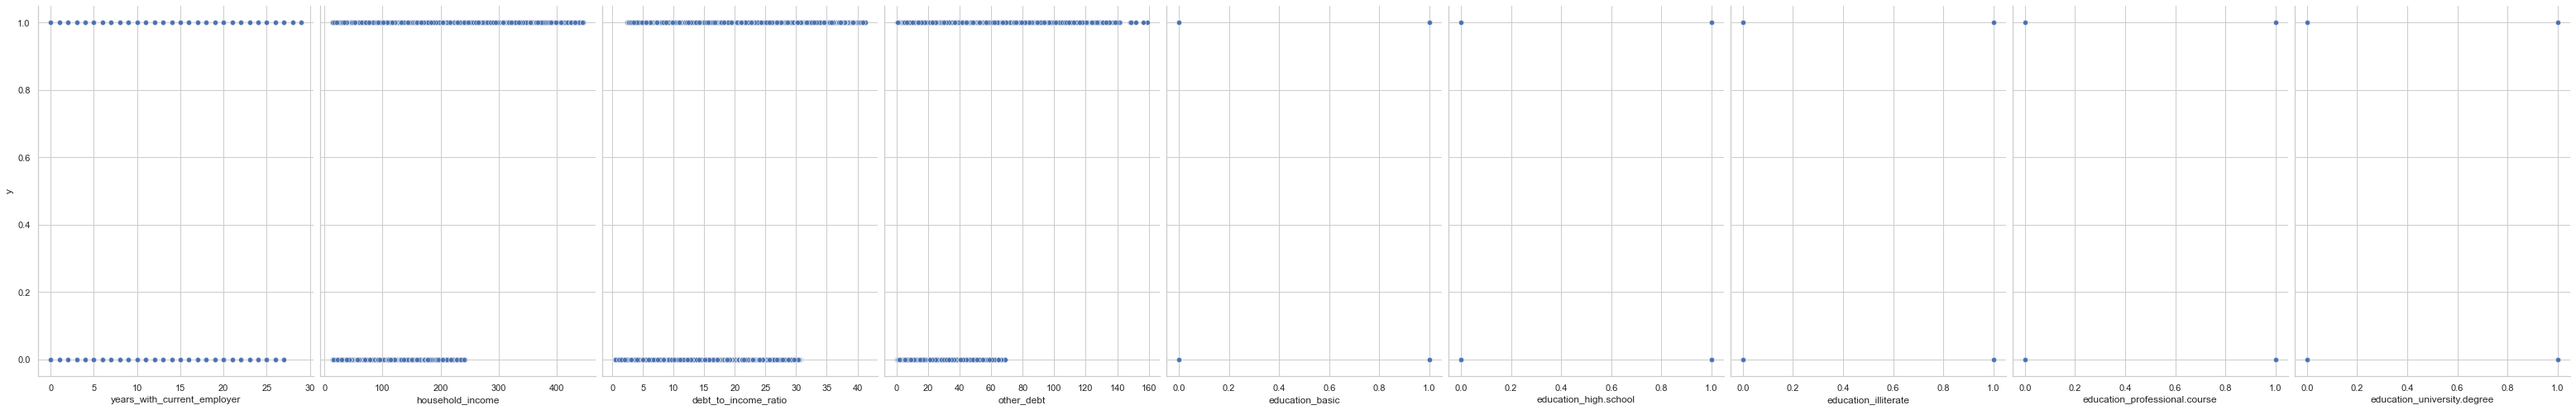

In [96]:
# visualize the relationship between the features and the response using scatterplots
p = sns.pairplot(df, x_vars=['years_with_current_employer', 'household_income', 'debt_to_income_ratio', 'other_debt', 'education_basic', 'education_high.school', 'education_illiterate', 'education_professional.course', 'education_university.degree'], y_vars='y', size=7, aspect=0.7)